# Simple linear regression with Keras

Here, we will create a program that will do a simple linear regression using the Keras library.
This program will contain research analysis and result explainations

## First - Lets import our libraries

In [1]:
import numpy as np #We will be using numpy to load our data and do our matrix operations
from keras.layers import Dense #creates a fully connected neural network
from keras.models import Model, Sequential
from keras import initializers
from keras import optimizers
from keras.callbacks import Callback
import matplotlib.pyplot as plt

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Second - Lets load our data with numpy

In [2]:
data = np.genfromtxt(fname = "SensData.csv", delimiter=",", names=["x", "y"]);   #Since we are loading a csv file, 
                                                                                #we specify the type of delimiter
                                                                                #we have also specify the data names
                                                                                #to make the retrieval more readable

### What kind of data do we have ?

The data we have loaded is a set of coordinates that follows a linear model, which will help us validate the and see our predicted model with Scikit-Learn

In [3]:
#Lets have a look of our data in a raw form (matrix way)
data

array([(2.0659, 0.77919), (2.3684, 0.91597), (2.54  , 0.90538),
       (2.5421, 0.90566), (2.5491, 0.93899), (2.7867, 0.96685),
       (2.9117, 0.96437), (3.0356, 0.91446), (3.1147, 0.93934),
       (3.1582, 0.96075), (3.3276, 0.89837), (3.3793, 0.9121 ),
       (3.4122, 0.94238), (3.4216, 0.96625), (3.5316, 1.0527 ),
       (3.6393, 1.0144 ), (3.6733, 0.95969), (3.9256, 0.96854),
       (4.0499, 1.0766 ), (4.2483, 1.1455 ), (4.344 , 1.0341 ),
       (4.3827, 1.007  ), (4.4231, 0.96684), (4.6102, 1.0896 ),
       (4.6881, 1.0634 ), (4.9777, 1.1237 ), (5.036 , 1.0323 ),
       (5.0685, 1.0874 ), (5.4161, 1.0703 ), (5.4396, 1.1606 ),
       (5.4563, 1.0778 ), (5.5698, 1.107  ), (5.6016, 1.0972 ),
       (5.6878, 1.1649 ), (5.7216, 1.1412 ), (5.8539, 1.0844 ),
       (6.1978, 1.1252 ), (6.3511, 1.1168 ), (6.4797, 1.1971 ),
       (6.7384, 1.2069 ), (6.8638, 1.1251 ), (7.0223, 1.1236 ),
       (7.0782, 1.2133 ), (7.1514, 1.2523 ), (7.4664, 1.2497 ),
       (7.5974, 1.18   ), (7.7441, 1.189

### Lets plot our data 

This way, we will be able to see that our data is based of a linear model

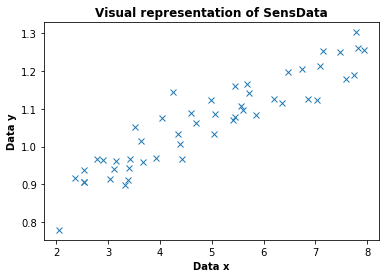

In [4]:
x = data["x"]; #Get the values in our x column
y = data["y"]; #Get the values in out y column
plt.title('Visual representation of SensData', fontweight="bold");
plt.xlabel("Data x", fontweight="bold");
plt.ylabel("Data y", fontweight="bold");
plt.plot(x,y,'x',label="The data");
plt.show()

## Third - Lets do our linear regression

Here we want to predict the value of "Data y" based on a feature "Data x".

#### Quick reminders:

A linear model is described as the following formula: 
\begin{align}
y = ax + b
\end{align}

In our case the linear model is described as follow: 
\begin{align}
h(x) = \theta_0 x_0 + \theta_1 x_1; x_0  = 1
\end{align}

since x0 is always going to have the value of 1, we can rewrite our model formula as follow:

\begin{align}
h(x) = \theta_0 + \theta_1 x_1
\end{align}

As we can see, our linear model looks a lot like the linear formula if we substitute the following variabes:

<ul>
 <li> h(x) <==> y
 <li> &thetasym;0 <==> b
 <li> &thetasym;1 x1 <==> ax
</ul>

#### Variables description:
<ul>
 <li> <b>h(x)</b>: Is the predicted output value from an input feature vector
 <li> <b>&thetasym;0</b>: Is the intercept of the function
 <li> <b>&thetasym;1</b>: Is the learned parameter value from our data
 <li> <b>x1</b>: Is the input value we want to predict
</ul>

### Lets create our regression model


#### Create a callback function so we can track the progress of our predictions through epochs

In [5]:
class PrintAndSaveWeights(Callback):
    """
    Print and save the weights after each epoch.
    """
    
    def on_train_begin(self, logs={}):
        """
        Create our weights history list when we begin training
        """
        self.weights_history = {"m":[], "b":[]};
    
    def on_epoch_end(self, batch, logs={}):
        """
        At the end of every epoch, save and print our slope and intercept weights
        """
        ## Get the current weights
        current_a= self.model.layers[-1].get_weights()[0][0][0];
        current_b = self.model.layers[-1].get_weights()[1][0];
        
        ## Save them to hour history object
        self.weights_history['m'].append(current_a);
        self.weights_history['b'].append(current_b);
        
        ## Print them after each epoch
        print ("\na={0} b={1}\n".format(current_a, current_b));

## Initialize our callback function for use in the model later
print_save_weights = PrintAndSaveWeights();


#### Create a simple fully connected (dense) model

In [6]:
## Create our model with a single dense layer, with a linear activation function and glorot (Xavier) input normalization
model = Sequential([
        Dense(1, activation='linear', input_shape=(1,), kernel_initializer='glorot_uniform')
    ]);

'''Compile our model using the method of mean squares error (mse) loss function 
    and a stochastic gradient descent (sgd) optimizer'''
sgd = optimizers.SGD(lr=0.03);# Set our learning rate to 0.03
model.compile(loss='mse', optimizer=sgd);


Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Lets fit our model with our data

In [7]:
## Fit our model to the noisy data we create above. Notes: 
## The validation split parameter reserves 20% of our data for validation (ie 80% will be used for training)
## The callback parameter is where we tell our model to use the callback function created above
## We will be using all of our training data at each epoch 
history = model.fit(x=x, y=y, validation_split=0.1,shuffle=True, batch_size=int(0.9*len(x)), epochs=1500, callbacks=[print_save_weights])


Train on 45 samples, validate on 5 samples
Epoch 1/1500

a=-0.3376493453979492 b=-0.36767399311065674

45/45 [==============================] - 1s 18ms/step - loss: 42.5499 - val_loss: 17.9025
Epoch 2/1500

a=0.5371609926223755 b=-0.1895570605993271

45/45 [==============================] - 0s 50us/step - loss: 9.1789 - val_loss: 7.5576
Epoch 3/1500

a=0.13095054030418396 b=-0.26393312215805054

45/45 [==============================] - 0s 68us/step - loss: 2.0387 - val_loss: 0.2355
Epoch 4/1500

a=0.3172680139541626 b=-0.22156615555286407

45/45 [==============================] - 0s 112us/step - loss: 0.5103 - val_loss: 1.0158
Epoch 5/1500

a=0.22952818870544434 b=-0.23324114084243774

45/45 [==============================] - 0s 46us/step - loss: 0.1825 - val_loss: 0.0995
Epoch 6/1500

a=0.2685586214065552 b=-0.21996349096298218

45/45 [==============================] - 0s 63us/step - loss: 0.1116 - val_loss: 0.3983
Epoch 7/1500

a=0.2489616870880127 b=-0.21827088296413422

45/45 [====

Epoch 56/1500

a=0.20973177254199982 b=0.011698931455612183

45/45 [==============================] - 0s 71us/step - loss: 0.0540 - val_loss: 0.1649
Epoch 57/1500

a=0.2089329957962036 b=0.015752092003822327

45/45 [==============================] - 0s 41us/step - loss: 0.0535 - val_loss: 0.1632
Epoch 58/1500

a=0.2081386297941208 b=0.01978285424411297

45/45 [==============================] - 0s 88us/step - loss: 0.0529 - val_loss: 0.1615
Epoch 59/1500

a=0.20734862983226776 b=0.023791339248418808

45/45 [==============================] - 0s 60us/step - loss: 0.0523 - val_loss: 0.1598
Epoch 60/1500

a=0.20656302571296692 b=0.02777768112719059

45/45 [==============================] - 0s 76us/step - loss: 0.0518 - val_loss: 0.1581
Epoch 61/1500

a=0.2057817280292511 b=0.03174199163913727

45/45 [==============================] - 0s 70us/step - loss: 0.0512 - val_loss: 0.1564
Epoch 62/1500

a=0.20500478148460388 b=0.03568439930677414

45/45 [==============================] - 0s 50us/ste

Epoch 112/1500

a=0.17116759717464447 b=0.20737846195697784

45/45 [==============================] - 0s 34us/step - loss: 0.0300 - val_loss: 0.0916
Epoch 113/1500

a=0.1705818921327591 b=0.21035036444664001

45/45 [==============================] - 0s 60us/step - loss: 0.0297 - val_loss: 0.0907
Epoch 114/1500

a=0.16999943554401398 b=0.21330584585666656

45/45 [==============================] - 0s 94us/step - loss: 0.0293 - val_loss: 0.0897
Epoch 115/1500

a=0.16942019760608673 b=0.21624499559402466

45/45 [==============================] - 0s 77us/step - loss: 0.0290 - val_loss: 0.0888
Epoch 116/1500

a=0.16884414851665497 b=0.21916790306568146

45/45 [==============================] - 0s 42us/step - loss: 0.0287 - val_loss: 0.0879
Epoch 117/1500

a=0.1682712882757187 b=0.22207465767860413

45/45 [==============================] - 0s 69us/step - loss: 0.0285 - val_loss: 0.0870
Epoch 118/1500

a=0.1677016019821167 b=0.22496534883975983

45/45 [==============================] - 0s 38us

Epoch 168/1500

a=0.14289115369319916 b=0.3508566617965698

45/45 [==============================] - 0s 33us/step - loss: 0.0170 - val_loss: 0.0516
Epoch 169/1500

a=0.14246170222759247 b=0.35303574800491333

45/45 [==============================] - 0s 41us/step - loss: 0.0169 - val_loss: 0.0511
Epoch 170/1500

a=0.1420346200466156 b=0.3552027940750122

45/45 [==============================] - 0s 34us/step - loss: 0.0167 - val_loss: 0.0506
Epoch 171/1500

a=0.14160990715026855 b=0.35735785961151123

45/45 [==============================] - 0s 56us/step - loss: 0.0165 - val_loss: 0.0501
Epoch 172/1500

a=0.14118753373622894 b=0.35950103402137756

45/45 [==============================] - 0s 52us/step - loss: 0.0164 - val_loss: 0.0496
Epoch 173/1500

a=0.14076749980449677 b=0.3616323471069336

45/45 [==============================] - 0s 60us/step - loss: 0.0162 - val_loss: 0.0491
Epoch 174/1500

a=0.14034979045391083 b=0.3637518882751465

45/45 [==============================] - 0s 57us/s

Epoch 224/1500

a=0.12215802073478699 b=0.45605915784835815

45/45 [==============================] - 0s 57us/step - loss: 0.0101 - val_loss: 0.0298
Epoch 225/1500

a=0.12184314429759979 b=0.4576569199562073

45/45 [==============================] - 0s 53us/step - loss: 0.0100 - val_loss: 0.0295
Epoch 226/1500

a=0.12152999639511108 b=0.45924586057662964

45/45 [==============================] - 0s 66us/step - loss: 0.0099 - val_loss: 0.0292
Epoch 227/1500

a=0.12121857702732086 b=0.46082600951194763

45/45 [==============================] - 0s 69us/step - loss: 0.0098 - val_loss: 0.0289
Epoch 228/1500

a=0.12090888619422913 b=0.4623974561691284

45/45 [==============================] - 0s 68us/step - loss: 0.0097 - val_loss: 0.0287
Epoch 229/1500

a=0.12060090154409409 b=0.463960200548172

45/45 [==============================] - 0s 40us/step - loss: 0.0096 - val_loss: 0.0284
Epoch 230/1500

a=0.12029462307691574 b=0.46551430225372314

45/45 [==============================] - 0s 32us/

Epoch 280/1500

a=0.10695584118366241 b=0.5331969261169434

45/45 [==============================] - 0s 51us/step - loss: 0.0063 - val_loss: 0.0177
Epoch 281/1500

a=0.10672496259212494 b=0.5343684554100037

45/45 [==============================] - 0s 48us/step - loss: 0.0063 - val_loss: 0.0176
Epoch 282/1500

a=0.10649535804986954 b=0.5355334877967834

45/45 [==============================] - 0s 40us/step - loss: 0.0062 - val_loss: 0.0174
Epoch 283/1500

a=0.10626702010631561 b=0.5366920828819275

45/45 [==============================] - 0s 44us/step - loss: 0.0062 - val_loss: 0.0173
Epoch 284/1500

a=0.10603994876146317 b=0.5378443002700806

45/45 [==============================] - 0s 60us/step - loss: 0.0061 - val_loss: 0.0171
Epoch 285/1500

a=0.1058141216635704 b=0.5389901399612427

45/45 [==============================] - 0s 56us/step - loss: 0.0061 - val_loss: 0.0170
Epoch 286/1500

a=0.10558955371379852 b=0.5401296615600586

45/45 [==============================] - 0s 49us/step

Epoch 336/1500

a=0.09580915421247482 b=0.5897566676139832

45/45 [==============================] - 0s 41us/step - loss: 0.0043 - val_loss: 0.0110
Epoch 337/1500

a=0.09563985466957092 b=0.5906156897544861

45/45 [==============================] - 0s 48us/step - loss: 0.0043 - val_loss: 0.0109
Epoch 338/1500

a=0.09547149389982224 b=0.591469943523407

45/45 [==============================] - 0s 45us/step - loss: 0.0043 - val_loss: 0.0109
Epoch 339/1500

a=0.09530407190322876 b=0.5923194885253906

45/45 [==============================] - 0s 71us/step - loss: 0.0042 - val_loss: 0.0108
Epoch 340/1500

a=0.0951375737786293 b=0.593164324760437

45/45 [==============================] - 0s 78us/step - loss: 0.0042 - val_loss: 0.0107
Epoch 341/1500

a=0.09497199207544327 b=0.5940045118331909

45/45 [==============================] - 0s 115us/step - loss: 0.0042 - val_loss: 0.0106
Epoch 342/1500

a=0.09480732679367065 b=0.5948400497436523

45/45 [==============================] - 0s 57us/step 

Epoch 392/1500

a=0.0876360684633255 b=0.6312279105186462

45/45 [==============================] - 0s 52us/step - loss: 0.0032 - val_loss: 0.0073
Epoch 393/1500

a=0.08751193434000015 b=0.6318577527999878

45/45 [==============================] - 0s 68us/step - loss: 0.0032 - val_loss: 0.0072
Epoch 394/1500

a=0.08738849312067032 b=0.6324841380119324

45/45 [==============================] - 0s 56us/step - loss: 0.0032 - val_loss: 0.0072
Epoch 395/1500

a=0.0872657299041748 b=0.63310706615448

45/45 [==============================] - 0s 36us/step - loss: 0.0032 - val_loss: 0.0071
Epoch 396/1500

a=0.08714363723993301 b=0.6337265372276306

45/45 [==============================] - 0s 48us/step - loss: 0.0032 - val_loss: 0.0071
Epoch 397/1500

a=0.08702223002910614 b=0.6343425512313843

45/45 [==============================] - 0s 39us/step - loss: 0.0032 - val_loss: 0.0070
Epoch 398/1500

a=0.08690150082111359 b=0.6349551677703857

45/45 [==============================] - 0s 43us/step - 

Epoch 448/1500

a=0.08164332807064056 b=0.6616358160972595

45/45 [==============================] - 0s 55us/step - loss: 0.0027 - val_loss: 0.0051
Epoch 449/1500

a=0.08155231177806854 b=0.6620976328849792

45/45 [==============================] - 0s 47us/step - loss: 0.0026 - val_loss: 0.0051
Epoch 450/1500

a=0.08146179467439651 b=0.6625568866729736

45/45 [==============================] - 0s 37us/step - loss: 0.0026 - val_loss: 0.0051
Epoch 451/1500

a=0.08137179166078568 b=0.6630136370658875

45/45 [==============================] - 0s 37us/step - loss: 0.0026 - val_loss: 0.0051
Epoch 452/1500

a=0.08128227293491364 b=0.6634678244590759

45/45 [==============================] - 0s 57us/step - loss: 0.0026 - val_loss: 0.0050
Epoch 453/1500

a=0.08119326084852219 b=0.6639195084571838

45/45 [==============================] - 0s 40us/step - loss: 0.0026 - val_loss: 0.0050
Epoch 454/1500

a=0.08110473304986954 b=0.6643686890602112

45/45 [==============================] - 0s 146us/st

Epoch 504/1500

a=0.07724923640489578 b=0.6839320063591003

45/45 [==============================] - 0s 52us/step - loss: 0.0023 - val_loss: 0.0039
Epoch 505/1500

a=0.07718249410390854 b=0.6842706203460693

45/45 [==============================] - 0s 40us/step - loss: 0.0023 - val_loss: 0.0039
Epoch 506/1500

a=0.07711613178253174 b=0.6846073865890503

45/45 [==============================] - 0s 52us/step - loss: 0.0023 - val_loss: 0.0039
Epoch 507/1500

a=0.07705012708902359 b=0.6849423050880432

45/45 [==============================] - 0s 47us/step - loss: 0.0023 - val_loss: 0.0039
Epoch 508/1500

a=0.07698448747396469 b=0.6852753162384033

45/45 [==============================] - 0s 46us/step - loss: 0.0023 - val_loss: 0.0039
Epoch 509/1500

a=0.07691922038793564 b=0.6856065392494202

45/45 [==============================] - 0s 51us/step - loss: 0.0023 - val_loss: 0.0038
Epoch 510/1500

a=0.07685430347919464 b=0.685935914516449

45/45 [==============================] - 0s 65us/step

Epoch 560/1500

a=0.07402735948562622 b=0.7002801895141602

45/45 [==============================] - 0s 45us/step - loss: 0.0022 - val_loss: 0.0032
Epoch 561/1500

a=0.07397842407226562 b=0.7005285024642944

45/45 [==============================] - 0s 71us/step - loss: 0.0022 - val_loss: 0.0032
Epoch 562/1500

a=0.07392975687980652 b=0.7007754445075989

45/45 [==============================] - 0s 56us/step - loss: 0.0022 - val_loss: 0.0032
Epoch 563/1500

a=0.0738813653588295 b=0.7010210156440735

45/45 [==============================] - 0s 48us/step - loss: 0.0022 - val_loss: 0.0032
Epoch 564/1500

a=0.07383322715759277 b=0.7012652158737183

45/45 [==============================] - 0s 58us/step - loss: 0.0022 - val_loss: 0.0032
Epoch 565/1500

a=0.07378537207841873 b=0.7015080451965332

45/45 [==============================] - 0s 41us/step - loss: 0.0022 - val_loss: 0.0031
Epoch 566/1500

a=0.07373778522014618 b=0.7017495632171631

45/45 [==============================] - 0s 44us/step

Epoch 616/1500

a=0.07166499644517899 b=0.7122671008110046

45/45 [==============================] - 0s 33us/step - loss: 0.0021 - val_loss: 0.0028
Epoch 617/1500

a=0.0716291218996048 b=0.7124491333961487

45/45 [==============================] - 0s 41us/step - loss: 0.0021 - val_loss: 0.0028
Epoch 618/1500

a=0.07159344851970673 b=0.7126301527023315

45/45 [==============================] - 0s 47us/step - loss: 0.0021 - val_loss: 0.0027
Epoch 619/1500

a=0.07155796885490417 b=0.712810218334198

45/45 [==============================] - 0s 116us/step - loss: 0.0021 - val_loss: 0.0027
Epoch 620/1500

a=0.07152266800403595 b=0.7129892706871033

45/45 [==============================] - 0s 51us/step - loss: 0.0021 - val_loss: 0.0027
Epoch 621/1500

a=0.07148758322000504 b=0.7131673097610474

45/45 [==============================] - 0s 39us/step - loss: 0.0021 - val_loss: 0.0027
Epoch 622/1500

a=0.07145269215106964 b=0.713344395160675

45/45 [==============================] - 0s 47us/step 

Epoch 672/1500

a=0.06993284821510315 b=0.7210562229156494

45/45 [==============================] - 0s 45us/step - loss: 0.0020 - val_loss: 0.0025
Epoch 673/1500

a=0.06990654766559601 b=0.7211897373199463

45/45 [==============================] - 0s 44us/step - loss: 0.0020 - val_loss: 0.0025
Epoch 674/1500

a=0.06988037377595901 b=0.7213224768638611

45/45 [==============================] - 0s 46us/step - loss: 0.0020 - val_loss: 0.0025
Epoch 675/1500

a=0.06985436379909515 b=0.7214545011520386

45/45 [==============================] - 0s 54us/step - loss: 0.0020 - val_loss: 0.0025
Epoch 676/1500

a=0.06982848793268204 b=0.7215858101844788

45/45 [==============================] - 0s 45us/step - loss: 0.0020 - val_loss: 0.0025
Epoch 677/1500

a=0.06980274617671967 b=0.7217163443565369

45/45 [==============================] - 0s 47us/step - loss: 0.0020 - val_loss: 0.0025
Epoch 678/1500

a=0.06977717578411102 b=0.7218461632728577

45/45 [==============================] - 0s 52us/ste

Epoch 728/1500

a=0.06866275519132614 b=0.727500855922699

45/45 [==============================] - 0s 114us/step - loss: 0.0020 - val_loss: 0.0023
Epoch 729/1500

a=0.0686434656381607 b=0.7275987267494202

45/45 [==============================] - 0s 56us/step - loss: 0.0020 - val_loss: 0.0023
Epoch 730/1500

a=0.06862428784370422 b=0.7276960611343384

45/45 [==============================] - 0s 49us/step - loss: 0.0020 - val_loss: 0.0023
Epoch 731/1500

a=0.0686052069067955 b=0.7277928590774536

45/45 [==============================] - 0s 38us/step - loss: 0.0020 - val_loss: 0.0023
Epoch 732/1500

a=0.06858623772859573 b=0.7278891205787659

45/45 [==============================] - 0s 58us/step - loss: 0.0020 - val_loss: 0.0023
Epoch 733/1500

a=0.06856737285852432 b=0.7279848456382751

45/45 [==============================] - 0s 52us/step - loss: 0.0020 - val_loss: 0.0023
Epoch 734/1500

a=0.06854861229658127 b=0.7280800342559814

45/45 [==============================] - 0s 50us/step 

Epoch 784/1500

a=0.06773146241903305 b=0.7322263717651367

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 785/1500

a=0.06771732121706009 b=0.7322981357574463

45/45 [==============================] - 0s 44us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 786/1500

a=0.0677032470703125 b=0.7323694825172424

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 787/1500

a=0.06768926978111267 b=0.7324404716491699

45/45 [==============================] - 0s 46us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 788/1500

a=0.06767535209655762 b=0.732511043548584

45/45 [==============================] - 0s 84us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 789/1500

a=0.06766152381896973 b=0.7325812578201294

45/45 [==============================] - 0s 45us/step - loss: 0.0020 - val_loss: 0.0022
Epoch 790/1500

a=0.06764776259660721 b=0.7326510548591614

45/45 [==============================] - 0s 52us/step 

Epoch 840/1500

a=0.06704862415790558 b=0.7356911897659302

45/45 [==============================] - 0s 47us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 841/1500

a=0.06703824549913406 b=0.7357438206672668

45/45 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 842/1500

a=0.06702793389558792 b=0.7357961535453796

45/45 [==============================] - 0s 36us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 843/1500

a=0.06701767444610596 b=0.7358481884002686

45/45 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 844/1500

a=0.06700747460126877 b=0.7358999252319336

45/45 [==============================] - 0s 74us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 845/1500

a=0.06699734181165695 b=0.7359513640403748

45/45 [==============================] - 0s 70us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 846/1500

a=0.06698726117610931 b=0.7360025644302368

45/45 [==============================] - 0s 63us/ste

Epoch 896/1500

a=0.06654798239469528 b=0.7382314801216125

45/45 [==============================] - 0s 54us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 897/1500

a=0.06654038280248642 b=0.7382700443267822

45/45 [==============================] - 0s 37us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 898/1500

a=0.06653282046318054 b=0.7383084297180176

45/45 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 899/1500

a=0.06652529537677765 b=0.7383465766906738

45/45 [==============================] - 0s 45us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 900/1500

a=0.06651782244443893 b=0.7383845448493958

45/45 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 901/1500

a=0.06651037186384201 b=0.7384222745895386

45/45 [==============================] - 0s 48us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 902/1500

a=0.06650298833847046 b=0.7384598255157471

45/45 [==============================] - 0s 43us/ste

Epoch 952/1500

a=0.06618090718984604 b=0.7400940656661987

45/45 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 953/1500

a=0.06617533415555954 b=0.740122377872467

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 954/1500

a=0.06616978347301483 b=0.740150511264801

45/45 [==============================] - 0s 47us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 955/1500

a=0.06616427004337311 b=0.7401784658432007

45/45 [==============================] - 0s 33us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 956/1500

a=0.06615879386663437 b=0.7402063012123108

45/45 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 957/1500

a=0.06615333259105682 b=0.7402339577674866

45/45 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.0021
Epoch 958/1500

a=0.06614791601896286 b=0.7402614951133728

45/45 [==============================] - 0s 53us/step 

Epoch 1008/1500

a=0.06591171771287918 b=0.7414599657058716

45/45 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1009/1500

a=0.06590763479471207 b=0.7414807081222534

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1010/1500

a=0.06590356677770615 b=0.7415013313293457

45/45 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1011/1500

a=0.06589952111244202 b=0.7415218353271484

45/45 [==============================] - 0s 33us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1012/1500

a=0.06589550524950027 b=0.7415422201156616

45/45 [==============================] - 0s 44us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1013/1500

a=0.06589151173830032 b=0.7415624856948853

45/45 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1014/1500

a=0.06588754057884216 b=0.7415826916694641

45/45 [==============================] - 0s 3


a=0.06571736931800842 b=0.7424461245536804

45/45 [==============================] - 0s 57us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1064/1500

a=0.06571435183286667 b=0.7424614429473877

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1065/1500

a=0.06571134924888611 b=0.7424766421318054

45/45 [==============================] - 0s 57us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1066/1500

a=0.06570837646722794 b=0.7424917817115784

45/45 [==============================] - 0s 58us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1067/1500

a=0.06570540368556976 b=0.7425068020820618

45/45 [==============================] - 0s 61us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1068/1500

a=0.06570246815681458 b=0.7425217628479004

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1069/1500

a=0.06569952517747879 b=0.7425366640090942

45/45 [==============================] - 0s 55us/step - loss:

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1119/1500

a=0.0655718743801117 b=0.7431843876838684

45/45 [==============================] - 0s 48us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1120/1500

a=0.06556966155767441 b=0.7431955933570862

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1121/1500

a=0.06556746363639832 b=0.7432067394256592

45/45 [==============================] - 0s 48us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1122/1500

a=0.06556528061628342 b=0.7432178258895874

45/45 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1123/1500

a=0.06556311249732971 b=0.7432288527488708

45/45 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1124/1500

a=0.06556094437837601 b=0.7432398200035095

45/45 [==============================] - 0s 39us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1125/1500

a=

Epoch 1174/1500

a=0.06546681374311447 b=0.7437174916267395

45/45 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1175/1500

a=0.06546518206596375 b=0.7437257766723633

45/45 [==============================] - 0s 53us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1176/1500

a=0.06546355783939362 b=0.7437340021133423

45/45 [==============================] - 0s 70us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1177/1500

a=0.06546194106340408 b=0.7437421679496765

45/45 [==============================] - 0s 52us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1178/1500

a=0.06546034663915634 b=0.743750274181366

45/45 [==============================] - 0s 48us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1179/1500

a=0.0654587522149086 b=0.7437583804130554

45/45 [==============================] - 0s 64us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1180/1500

a=0.06545716524124146 b=0.7437664270401001

45/45 [==============================] - 0s 53u


45/45 [==============================] - 0s 49us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1230/1500

a=0.06538811326026917 b=0.7441167831420898

45/45 [==============================] - 0s 51us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1231/1500

a=0.06538692116737366 b=0.7441228628158569

45/45 [==============================] - 0s 50us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1232/1500

a=0.06538572907447815 b=0.7441288828849792

45/45 [==============================] - 0s 48us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1233/1500

a=0.06538455188274384 b=0.7441349029541016

45/45 [==============================] - 0s 50us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1234/1500

a=0.06538336724042892 b=0.7441408634185791

45/45 [==============================] - 0s 58us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1235/1500

a=0.0653822049498558 b=0.7441468238830566

45/45 [==============================] - 0s 46us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1236/1500

a

Epoch 1285/1500

a=0.06533127278089523 b=0.744405210018158

45/45 [==============================] - 0s 61us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1286/1500

a=0.0653303936123848 b=0.7444096803665161

45/45 [==============================] - 0s 38us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1287/1500

a=0.06532951444387436 b=0.7444141507148743

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1288/1500

a=0.06532864272594452 b=0.7444185614585876

45/45 [==============================] - 0s 46us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1289/1500

a=0.06532777845859528 b=0.744422972202301

45/45 [==============================] - 0s 53us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1290/1500

a=0.06532691419124603 b=0.7444273233413696

45/45 [==============================] - 0s 86us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1291/1500

a=0.06532606482505798 b=0.7444316744804382

45/45 [==============================] - 0s 43us

Epoch 1340/1500

a=0.06528943032026291 b=0.7446175813674927

45/45 [==============================] - 0s 86us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1341/1500

a=0.06528876721858978 b=0.7446208596229553

45/45 [==============================] - 0s 80us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1342/1500

a=0.06528813391923904 b=0.744624137878418

45/45 [==============================] - 0s 80us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1343/1500

a=0.06528748571872711 b=0.7446274161338806

45/45 [==============================] - 0s 60us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1344/1500

a=0.06528684496879578 b=0.7446306347846985

45/45 [==============================] - 0s 54us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1345/1500

a=0.06528621912002563 b=0.7446338534355164

45/45 [==============================] - 0s 62us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1346/1500

a=0.0652855783700943 b=0.7446370720863342

45/45 [==============================] - 0s 38u

Epoch 1396/1500

a=0.06525807082653046 b=0.7447766661643982

45/45 [==============================] - 0s 57us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1397/1500

a=0.06525759398937225 b=0.744779109954834

45/45 [==============================] - 0s 87us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1398/1500

a=0.06525710970163345 b=0.744781494140625

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1399/1500

a=0.06525664776563644 b=0.744783878326416

45/45 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1400/1500

a=0.06525617837905884 b=0.744786262512207

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1401/1500

a=0.06525571644306183 b=0.744788646697998

45/45 [==============================] - 0s 40us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1402/1500

a=0.06525523960590363 b=0.7447909712791443

45/45 [==============================] - 0s 44us/s

Epoch 1452/1500

a=0.06523507833480835 b=0.7448933124542236

45/45 [==============================] - 0s 47us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1453/1500

a=0.0652347281575203 b=0.7448951005935669

45/45 [==============================] - 0s 37us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1454/1500

a=0.06523437798023224 b=0.7448968887329102

45/45 [==============================] - 0s 41us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1455/1500

a=0.06523402780294418 b=0.7448986172676086

45/45 [==============================] - 0s 34us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1456/1500

a=0.06523369252681732 b=0.7449003458023071

45/45 [==============================] - 0s 43us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1457/1500

a=0.06523334980010986 b=0.7449020743370056

45/45 [==============================] - 0s 42us/step - loss: 0.0020 - val_loss: 0.0020
Epoch 1458/1500

a=0.065233014523983 b=0.7449038028717041

45/45 [==============================] - 0s 44us

### Lets print our model formula

In [8]:
a = model.get_weights()[0][0][0]
b = model.get_weights()[1][0]
print ('h(x) = {0} + {1} * x'.format(b,a));

h(x) = 0.7449681162834167 + 0.06522034108638763 * x


### Lets predict some values of x

Here, we are going to predict the output value of the following input values {3.5, 5, 5.5, 7}

In [9]:
xToPredict = [3.5, 5, 5.5, 7];
predictions = model.predict(xToPredict)
index = 0;
for val in xToPredict:
    print ('The predicted value of {0}\tis\t{1}'.format(val, predictions[index][0]));
    index = index + 1;

The predicted value of 3.5	is	0.9732393026351929
The predicted value of 5	is	1.0710698366165161
The predicted value of 5.5	is	1.1036800146102905
The predicted value of 7	is	1.2015104293823242


### Lets observe our learning curve from our training and validation data

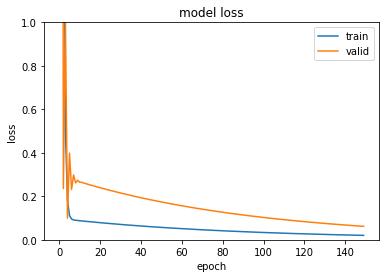

In [10]:
plt.plot(history.history['loss'][0:150])
plt.plot(history.history['val_loss'][0:150])
plt.ylim([0,1])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

### Lets see the fit of our model to our original data

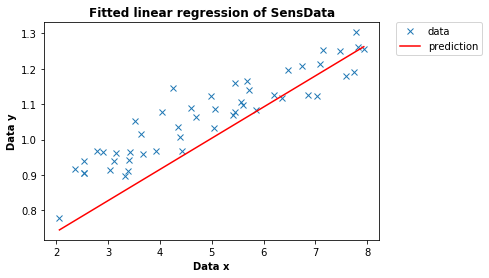

In [11]:
min_x = min(x);
max_x = max(x);

plt.title('Fitted linear regression of SensData', fontweight="bold");
plt.xlabel("Data x", fontweight="bold");
plt.ylabel("Data y", fontweight="bold");
plt.plot(x,y, 'x', label="data"); #Our original data
plt.plot([min_x, max_x], [b, a * max_x + b], color="r", label="prediction");#Showing the line starting from the intercept (b) and 
                                                        #finishng at the predicted value of max_x (a * max_x + b)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

## Scikit-Learn Vs Keras for linear regression of SensData

As we can observe by comparing the results on file "boototokime_Sckt_LR.ipynb" and the current one, the resulting linear regression model obtained with Keras is the same as the one obtained with Scikit-Learn. This is very good and reinsuring, because this means that both libraries will found the optimal regression for a given dataset.


### Lets have a look on the differences between the two libraries


#### Model formula 


<p><b>Scikit-Learn</b>: h(x) = 0.750167784345263 + 0.06387975236997191 * x</p>
<p><b>Keras</b>       : h(x) = 0.7449966669082642 + 0.06521470844745636 * x</p>


<p>As we can see, the two models are very similar despite, one thing to bserve is that were one has underestimated, the other has overestimated and vice-versa.</p> 


#### Model Predictions for the values {3.5, 5, 5.5, 7}

<p><b>Scikit-Learn:</b></p>

<p>The predicted value of 3.5	is	0.9737469176401647</p>
<p>The predicted value of 5	is	1.0695665461951225</p>
<p>The predicted value of 5.5	is	1.1015064223801085</p>
<p>The predicted value of 7	is	1.1973260509350663</p>

<p><b>Keras</b>:</p>

<p>The predicted value of 3.5	is	0.9732481241226196</p>
<p>The predicted value of 5	is	1.0710701942443848</p>
<p>The predicted value of 5.5	is	1.10367751121521</p>
<p>The predicted value of 7	is	1.2014997005462646</p>

<p>Once again very similar values despite negligeable differences depending on the application</p>

#### Model lost (error)

<p><b>Scikit-Learn</b>: 0.0019743600067480046</p>

<p><b>Keras</b>       : 0.0020</p>

Again, very limilar lost values 